In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data provided

In [2]:
data = {
    'Gender': ['M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'M', 'M'],
    'Smoker': ['YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO'],
    'Weight': [80, 81, 75, 83, 71, 73, 65, 67, 54, 77, 55, 83, 91, 6, 92, 86, 73, 82, 69, 73, 70, 59, 68, 72, 72]
}
df = pd.DataFrame(data)
n = df['Weight'].count()
df.head()

,Gender,Smoker,Weight
0,M,YES,80
1,M,NO,81
2,M,NO,75
3,M,YES,83
4,F,YES,71


### Box Plot for the given data. (To detect any outliers)

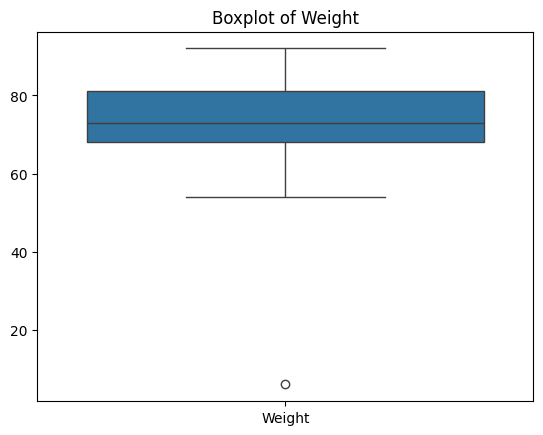

In [3]:
sns.boxplot(data=df)
plt.title('Boxplot of Weight')
plt.show()

- Found one outlier. 
  - 14th Row -> Weight = 6 (Impossible !) 
- Probably a typo. So we remove the 14th row from our dataframe.

In [4]:
# Remove outliers - just one (weight cannot be 6 !)
df = df[df['Weight'] > 10]

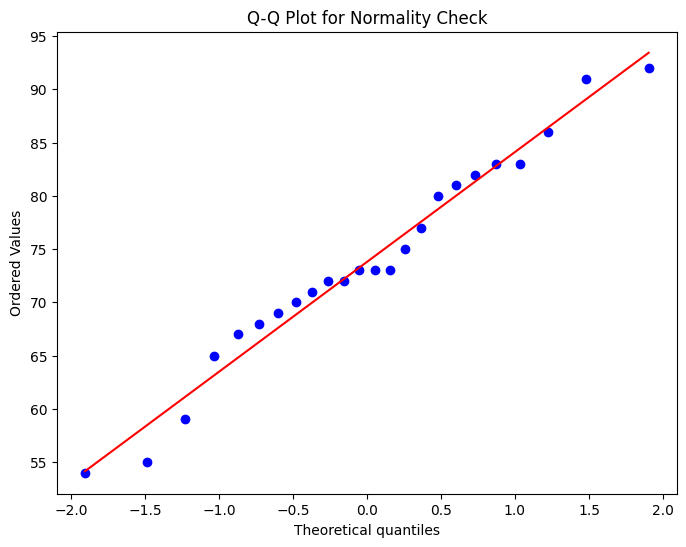

In [5]:
# Creating a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df['Weight'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.show()

Από την παραπάνω ανάλυση συμπαιρένουμε τα εξής:
- Η κατανομή δεν φαίνεται να είναι ιδιαίτερα ασυμμετρική.
- Το δείγμα προέκυψε από απλή τυχαία δειγματοληψία (SRS)
- Τελικό δείγμα, αρκετά μεγάλο. n=24 > 15

##### Επομένως μπορούμε να εφαρμόσουμε t στατιστικούς ελέγχους και να περιμένουμε αρκετά καλή ακρίβεια.

### a). Δώστε ένα 95% διάστημα εμπιστοσύνης για το μέσο βάρος των ενηλίκων κατοίκων Αθήνας.


#### Mean Weight

In [6]:
# The Mean Weight
mean_weight = df['Weight'].mean()
mean_weight

73.79166666666667

In [7]:
# Sample Standard Deviation
std_weight = df['Weight'].std()
std_weight

9.978146410887216

#### Standard Error of the Mean Weight

In [8]:
# Standard Error of the Mean Weight
sem_weight = df['Weight'].sem()
sem_weight

2.0367806071214183

#### t-score for the 95% CI

In [9]:
# Υπολογισμός του 95% διαστήματος εμπιστοσύνης για τη μέση τιμή
confidence_level = 0.95
degrees_of_freedom = len(df['Weight']) - 1
t_score_95 = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
t_score_95

2.0686576104190406

#### Margin of Error for the 95% CI

In [10]:
# Margin of Error for the 95% Confidence Interval
margin_of_error_95 = t_score_95 * sem_weight
margin_of_error_95

4.213401703675636

#### 95% CI for the Mean Weight

In [11]:
# Confidence Interval for the Mean Weight
confidence_interval_95 = (mean_weight - abs(margin_of_error_95), mean_weight + abs(margin_of_error_95))
confidence_interval_95

(69.57826496299103, 78.00506837034231)

### b). Δώστε ένα 80% διάστημα εμπιστοσύνης για τη διαφορά του μέσου βάρους μεταξύ ανδρών και γυναικών (ενηλίκους κατοίκους Αθηνών).

In [12]:
# dataframe of only men's weight
men_weight = df.groupby('Gender').get_group('M')['Weight']
count_of_men = men_weight.count() # sample size for men = 13


#### Παρατηρούμε ότι η κατανομή του βάρους των ανδρών είναι αρκετά συμμετρική.

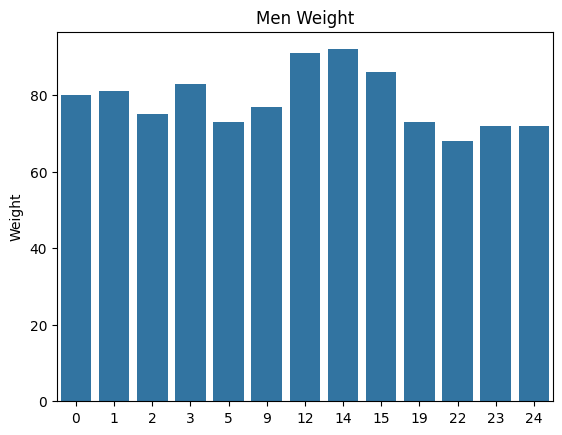

In [13]:
sns.barplot(men_weight)
plt.title('Men Weight')
plt.show()

#### Mean Weight for Men

In [14]:
mean_weight_men = men_weight.mean()
mean_weight_men

78.6923076923077

#### Sample STD of Men's Weight

In [15]:
std_weight_men = men_weight.std(ddof=1) # ddof=1 for sample standard deviation
std_weight_men

7.598076679711072

In [16]:
# dataframe of only women's weight
women_weight = df.groupby('Gender').get_group('F')['Weight'] 
count_of_women = women_weight.count() # sample size for women = 11

#### Παρατηρούμε ότι η κατανομή του βάρους των γυναικών είναι και αυτή αρκετά συμμετρική.

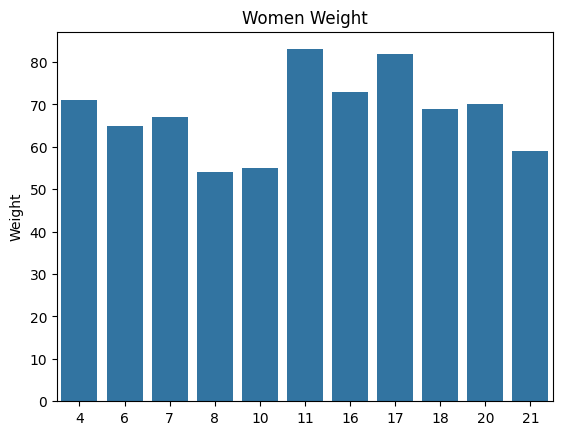

In [17]:
sns.barplot(women_weight)
plt.title('Women Weight')
plt.show()

#### Mean Weight for Women

In [18]:
mean_weight_women = women_weight.mean() 
mean_weight_women

68.0

#### Sample STD of Women's Weight

In [19]:
std_weight_women = women_weight.std(ddof=1) # ddof=1 for sample standard deviation
std_weight_women

9.57078889120432

### Difference of Men's Mean Weight and Women's Mean Weight

In [20]:
delta_mean_weight = abs(mean_weight_men - mean_weight_women)
delta_mean_weight

10.692307692307693

#### Standard Error of the Delta of Mean Weights

In [21]:
std_weight_men_squared = std_weight_men ** 2
std_weight_women_squared = std_weight_women ** 2
delta_sem_weight = np.sqrt( (std_weight_men_squared / count_of_men) + (std_weight_women_squared / count_of_women) )
delta_sem_weight

3.5732479804289534

#### t-score for the 80% CI

In [22]:
# Υπολογισμός του 80% διαστήματος εμπιστοσύνης για τη διαφορά των μέσων τιμών
confidence_level = 0.80
degrees_of_freedom = min(len(men_weight) -1 , len(women_weight) - 1)
t_score_80 = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
t_score_80

1.3721836411102863

#### Margin of Error for the 80% CI

In [23]:
margin_of_error_80 = delta_sem_weight * t_score_80
margin_of_error_80

4.903152424374978

#### 80% CI for the Delta of Mean Weights

In [24]:
confidence_interval_80 = (delta_mean_weight - abs(margin_of_error_80), delta_mean_weight + (margin_of_error_80))
confidence_interval_80

(5.789155267932715, 15.595460116682672)

### Τρόπος εύρεσης του επιθυμητού διαστήματος με μία γραμμή κώδικα

In [25]:
confidence_interval_80_2 = stats.t.interval(confidence=0.80, df=min(len(men_weight)-1, len(women_weight)-1), loc=delta_mean_weight, scale=delta_sem_weight) 
confidence_interval_80_2

(5.789155267932715, 15.595460116682672)

### c). Το κάπνισμα έχει σχέση με το βάρος; Διατυπώστε έναν κατάλληλο έλεγχο σημαντικότητας και σχολιάστε τα ευρήματά σας.

#### Χωρίζουμε τα δεδομένα σε 2 κατηγορίες: Σε καπνιστές και σε μη καπνιστές.

In [26]:
no_smokers_weight = df.groupby('Smoker').get_group('NO')['Weight']
count_of_no_smokers = no_smokers_weight.count() # sample size for non-smokers = 14

In [27]:
smokers_weight = df.groupby('Smoker').get_group('YES')['Weight']
count_of_smokers = smokers_weight.count() # sample size for smokers = 10

#### Παρατηρούμε ότι η κατανομή του βάρους των καπνιστών είναι αρκετά συμμετρική.

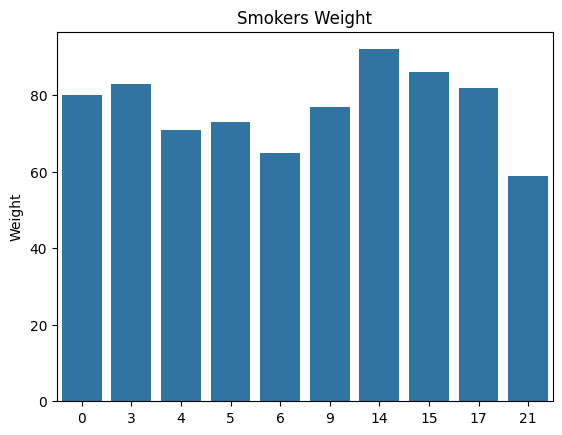

In [28]:
sns.barplot(smokers_weight)
plt.title('Smokers Weight')
plt.show()

#### Παρατηρούμε ότι η κατανομή του βάρους των μη καπνιστών είναι και αυτή αρκετά συμμετρική.

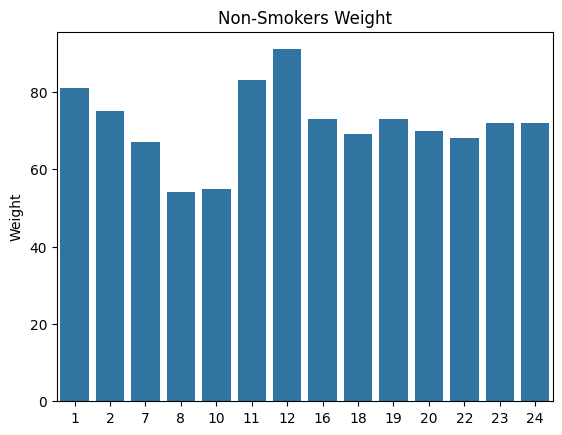

In [29]:
sns.barplot(no_smokers_weight)
plt.title('Non-Smokers Weight')
plt.show()

#### Mean Weight for the non smokers

In [55]:
mean_weight_no_smokers = no_smokers_weight.mean()
mean_weight_no_smokers

71.64285714285714

#### Sample STD for weight of the non smokers

In [56]:
std_weight_no_smokers = no_smokers_weight.std(ddof=1) # ddof=1 for sample standard deviation
std_weight_no_smokers

9.763410051010654

#### Mean Weight for the smokers

In [57]:
mean_weight_smokers = smokers_weight.mean()
mean_weight_smokers

76.8

#### Sample STD for the weight of the smokers

In [58]:
std_weight_smokers = smokers_weight.std(ddof=1) # ddof=1 for sample standard deviation  
std_weight_smokers

9.975525605756877

In [62]:
t_stat, p_value = stats.ttest_ind(no_smokers_weight, smokers_weight, equal_var=False)

#### T-statistic (σε απόλυτη τιμή)

In [63]:
abs(t_stat) 

1.259715297625312

#### P-value

In [64]:
p_value # p-value is more than 0.05, so we cannot reject the null hypothesis

0.22280799190887193

- Αφού η τιμή του p-value είναι μεγαλύτερη από το τυπικά αποδεκτό 5% κατώφλι (0.22281 > 0.05), δεν υπάρχει αρκετή στατιστική απόδειξη για να απορρίψουμε την μηδενική υπόθεση, η οποία λέει ότι ΔΕΝ υπάρχει διαφορά στο μέσο βάρος καπνιστών και μη καπνιστών.